# 01 - Data Overview

This notebook will explore the raw Spotify dataset to get a better understanding of its structure, missing values, and inspect key features such as popularity, tempo, energy, and other audio characteristics. This will help guide our preprocessing and feature selection for clustering.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load the raw dataset
df = pd.read_csv("../data/raw/spotify_tracks.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Basic dataset information

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [3]:
df.describe(include="all")

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,114000.000000,114000,113999,113999,113999,114000.000000,1.140000e+05,114000,114000.000000,114000.000000,...,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000
unique,NaN,89741,31437,46589,73608,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
top,NaN,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic
freq,NaN,9,279,195,151,NaN,NaN,104253,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,56999.500000,NaN,NaN,NaN,NaN,33.238535,2.280292e+05,NaN,0.566800,0.641383,...,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,NaN
std,32909.109681,NaN,NaN,NaN,NaN,22.305078,1.072977e+05,NaN,0.173542,0.251529,...,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,0.000000,0.000000,...,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,28499.750000,NaN,NaN,NaN,NaN,17.000000,1.740660e+05,NaN,0.456000,0.472000,...,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,NaN
50%,56999.500000,NaN,NaN,NaN,NaN,35.000000,2.129060e+05,NaN,0.580000,0.685000,...,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,NaN
75%,85499.250000,NaN,NaN,NaN,NaN,50.000000,2.615060e+05,NaN,0.695000,0.854000,...,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,NaN


## Missing values and duplicates

In [5]:
# Missing values per column
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
# Number of duplicated rows
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


## Districutions of key numeric features

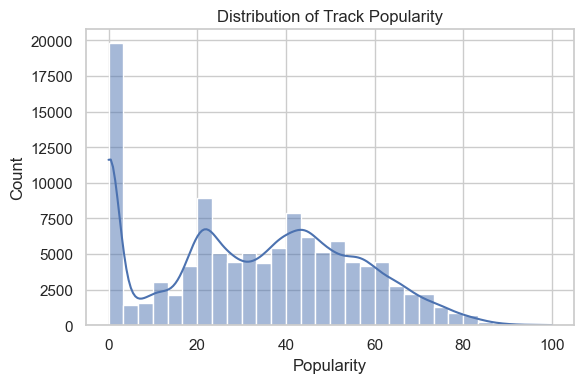

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df["popularity"], kde=True, bins=30)

plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

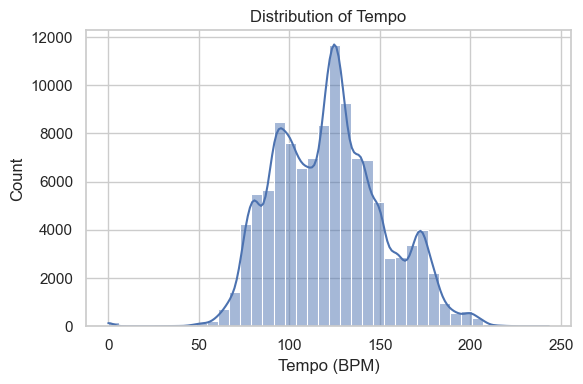

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(df["tempo"], kde=True, bins=40)
plt.title("Distribution of Tempo")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

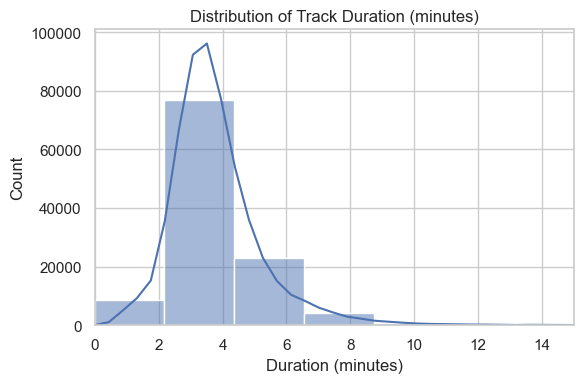

In [16]:
# Convert duration to minutes for easier interpretation
df["duration_min"] = df["duration_ms"] / 60000

plt.figure(figsize=(6, 4))
plt.xlim(0, 15)

sns.histplot(df["duration_min"], kde=True, bins=40)
plt.title("Distribution of Track Duration (minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Categorical overview: genres and explicit flag

In [17]:
# Top 15 genres by track count
top_genres = df["track_genre"].value_counts().head(15)
top_genres

track_genre
acoustic         1000
afrobeat         1000
alt-rock         1000
alternative      1000
ambient          1000
anime            1000
black-metal      1000
bluegrass        1000
blues            1000
brazil           1000
breakbeat        1000
british          1000
cantopop         1000
chicago-house    1000
children         1000
Name: count, dtype: int64

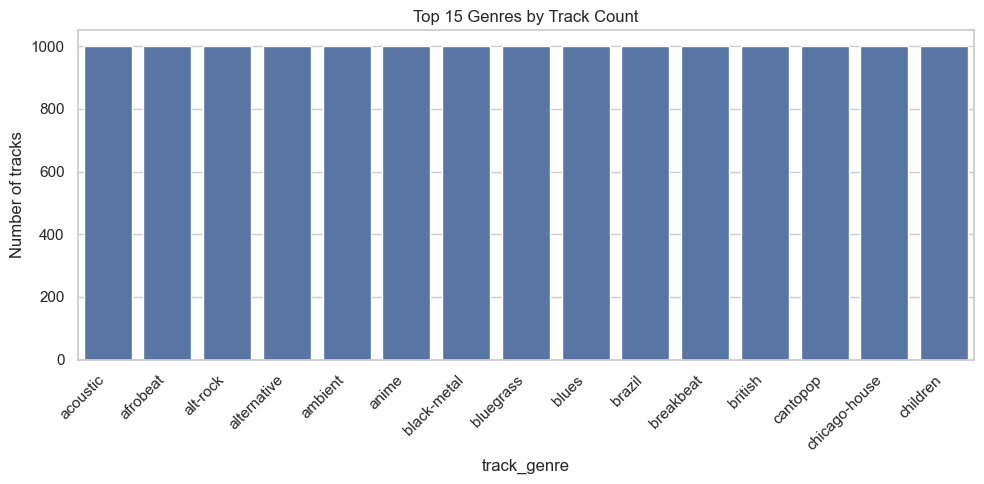

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.xticks(rotation=45, ha="right")
plt.title("Top 15 Genres by Track Count")
plt.ylabel("Number of tracks")
plt.tight_layout()
plt.show()

We see from the table and barplot above that there are the same amount of tracks in each of the top 15 genres.

In [19]:
df["explicit"].value_counts()

explicit
False    104253
True       9747
Name: count, dtype: int64

## Correlation between audio features

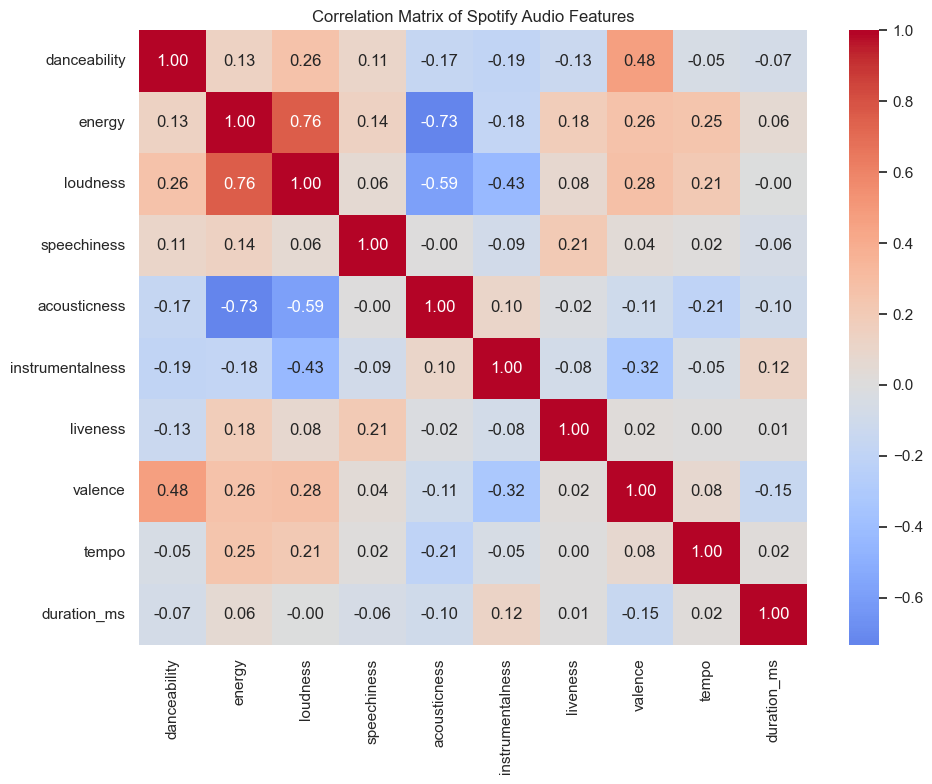

In [20]:
features = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
]

corr = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Spotify Audio Features")
plt.tight_layout()
plt.show()

## Summary

* Inspected the overall structure of the raw Spotify tracks dataset.
* Checked for missing values and duplicated rows.
* Visualized distributions of key features such as popularity, tempo, and duration.
* Looked at the most frequent genres and the distribution of the explicit flag.
* Examined correlations between main audio features to understand which are strongly related.

These observations will guide our preprocessing and feature selection decisions in the next notebook.